In [6]:
import pandas as pd
import numpy as np

In [8]:
file_path = "initial_datasets/boardex_sample_1000.csv"

data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Associationtype,Boardname,Companyname,Directorname,Overlapyearstart,Overlapyearend,Role,Associatedrole,Conncompanyorgtype,Boardid,...,Roletitle,Roleboardposition,Roleedflag,Overlapyearstart_int,Overlapyearend_int,Startcompanydatestartrole,Startcompanydateendrole,Conncompanydatestartrole,Conncompanydateendrole,Orgtype
0,Other,1 800 CONTACTS INC (De-listed 09/2007),Rhode Island School of Design (RISD),Steve Key,2006,2007,Independent Director (Brd) (SD),Vice Chairman,Universities,3,...,Independent Director,Brd,SD,2006,2007.0,2005-07-28,2007-09-07,NaN,NaN,Quoted
1,Unlisted Org,1 800 CONTACTS INC (De-listed 09/2007),Key Consulting LLC,Steve Key,2005,2007,Independent Director (Brd) (SD),Sole Proprietor (Non-Brd),Private,3,...,Independent Director,Brd,SD,2005,2007.0,2005-07-28,2007-09-07,2001-01-01,NaN,Quoted
2,Unlisted Org,1 800 CONTACTS INC (De-listed 09/2007),JD Watkins Enterprises Inc,Steve Key,2006,2007,Independent Director (Brd) (SD),Vice Chairman/COO (Brd) (ED),Private,3,...,Independent Director,Brd,SD,2006,2007.0,2005-07-28,2007-09-07,2006-01-01,NaN,Quoted
3,Listed Org,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,2006,2007,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,3,...,Independent Director,Brd,SD,2006,2007.0,2005-07-28,2007-09-07,2006-08-04,2007-01-31,Quoted
4,Unlisted Org,1 800 CONTACTS INC (De-listed 09/2007),JD Watkins Enterprises Inc,Steve Key,2005,2006,Independent Director (Brd) (SD),Vice Chairman/CFO (Brd) (ED),Private,3,...,Independent Director,Brd,SD,2005,2006.0,2005-07-28,2007-09-07,2001-02-01,2006-01-01,Quoted


How they're creating graphs though, they're doing this iteratively, so make sure to do this

That's the idea - still need to change the code though by understanding the data to make it work!!

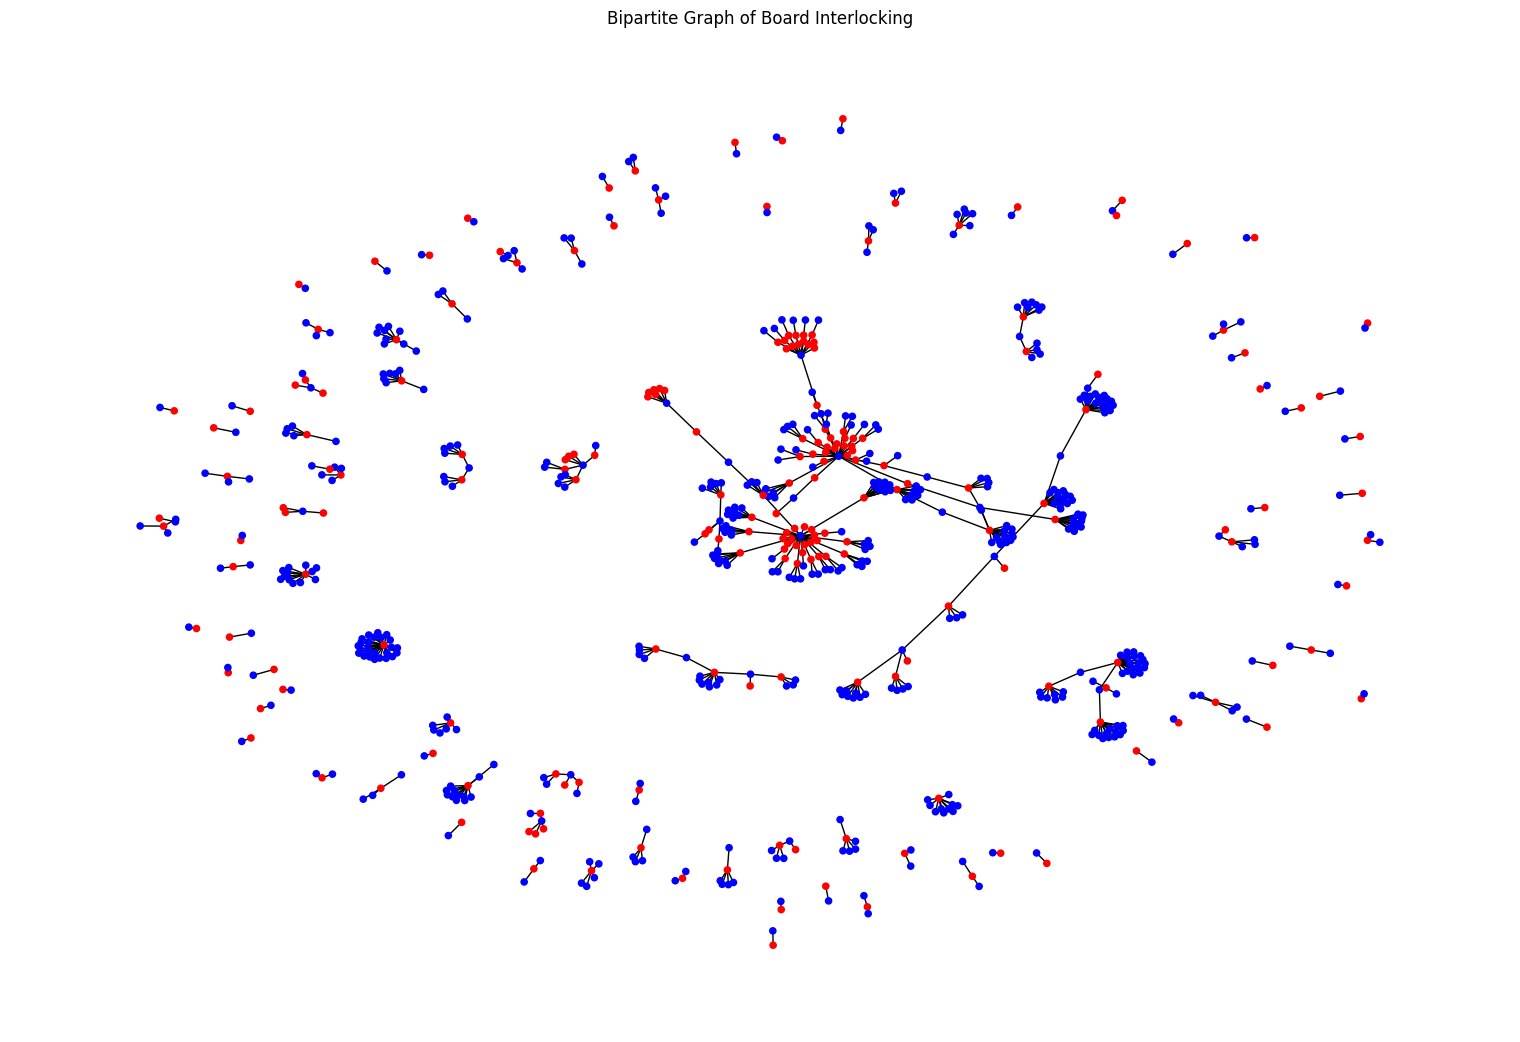

In [9]:

# THIS IS WRONG!! STILL NEED TO REDO THIS!! Methdology okay

# this still makes sense - can edit it in terms of this kind of graph - but chnage it with the director id and company id

import networkx as nx
import matplotlib.pyplot as plt

# Filter the necessary columns
filtered_data = data[['Boardid', 'Companyname', 'Directorname', 'Overlapyearstart', 'Overlapyearend']]

# Create the bipartite graph
B = nx.Graph()

# Add nodes and edges with appropriate attributes
for index, row in filtered_data.iterrows():
    B.add_node(row['Directorname'], bipartite=0)  # Add director nodes
    B.add_node(row['Companyname'], bipartite1=1)  # Add company nodes
    B.add_edge(row['Directorname'], row['Companyname'], start=row['Overlapyearstart'], end=row['Overlapyearend'])

# Draw the bipartite graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(B)

# Get node colors based on bipartite set
colors = ['red' if node in filtered_data['Directorname'].values else 'blue' for node in B.nodes()]
nx.draw(B, pos, with_labels=False,#True, 
        node_color=colors, node_size=20, font_size=10, font_color='black')

plt.title('Bipartite Graph of Board Interlocking')
plt.show()


In [18]:
filtered_data['Overlapyearstart'].min(), filtered_data['Overlapyearend'].replace("Curr", 2024).max()

(1986, 2024.0)

In [17]:
filtered_data['Overlapyearend'].to_list()

[2007.0,
 2007.0,
 2007.0,
 2007.0,
 2006.0,
 2007.0,
 2006.0,
 2007.0,
 2006.0,
 2007.0,
 2007.0,
 2007.0,
 2007.0,
 2007.0,
 2006.0,
 2006.0,
 2006.0,
 2006.0,
 2011.0,
 2006.0,
 2013.0,
 2006.0,
 2012.0,
 2013.0,
 2011.0,
 2012.0,
 2016.0,
 2016.0,
 2011.0,
 2011.0,
 2006.0,
 2012.0,
 2006.0,
 2012.0,
 2008.0,
 2008.0,
 2007.0,
 2007.0,
 2007.0,
 2006.0,
 2011.0,
 2012.0,
 2008.0,
 2006.0,
 2010.0,
 2016.0,
 2017.0,
 2016.0,
 2006.0,
 2007.0,
 2009.0,
 2007.0,
 2007.0,
 2007.0,
 2010.0,
 2007.0,
 2021.0,
 2018.0,
 2016.0,
 2007.0,
 2007.0,
 2007.0,
 2007.0,
 2009.0,
 2018.0,
 2007.0,
 2007.0,
 2007.0,
 2016.0,
 2008.0,
 2010.0,
 2006.0,
 2009.0,
 2007.0,
 2007.0,
 2007.0,
 2009.0,
 2009.0,
 2007.0,
 2007.0,
 2011.0,
 2009.0,
 2006.0,
 2019.0,
 2008.0,
 2008.0,
 2008.0,
 2008.0,
 2008.0,
 2008.0,
 2007.0,
 2008.0,
 2008.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2007.0,
 2009.0,
 2007.0,
 2007.0,
 2007.0,
 2007.0,
 2007.0,
 2006.0,
 2006.0,
 2007.0,
 2007.0,
 2008.0,
 2009.0,
 2009.0,
 

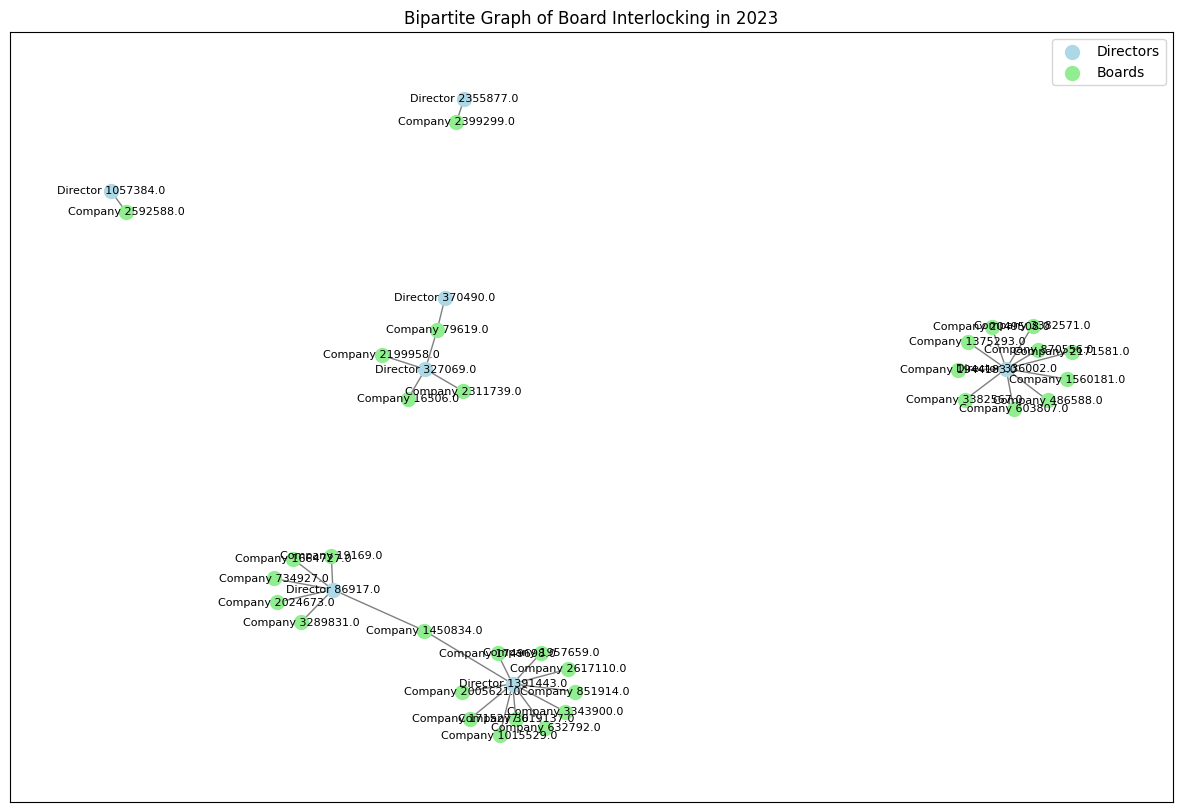

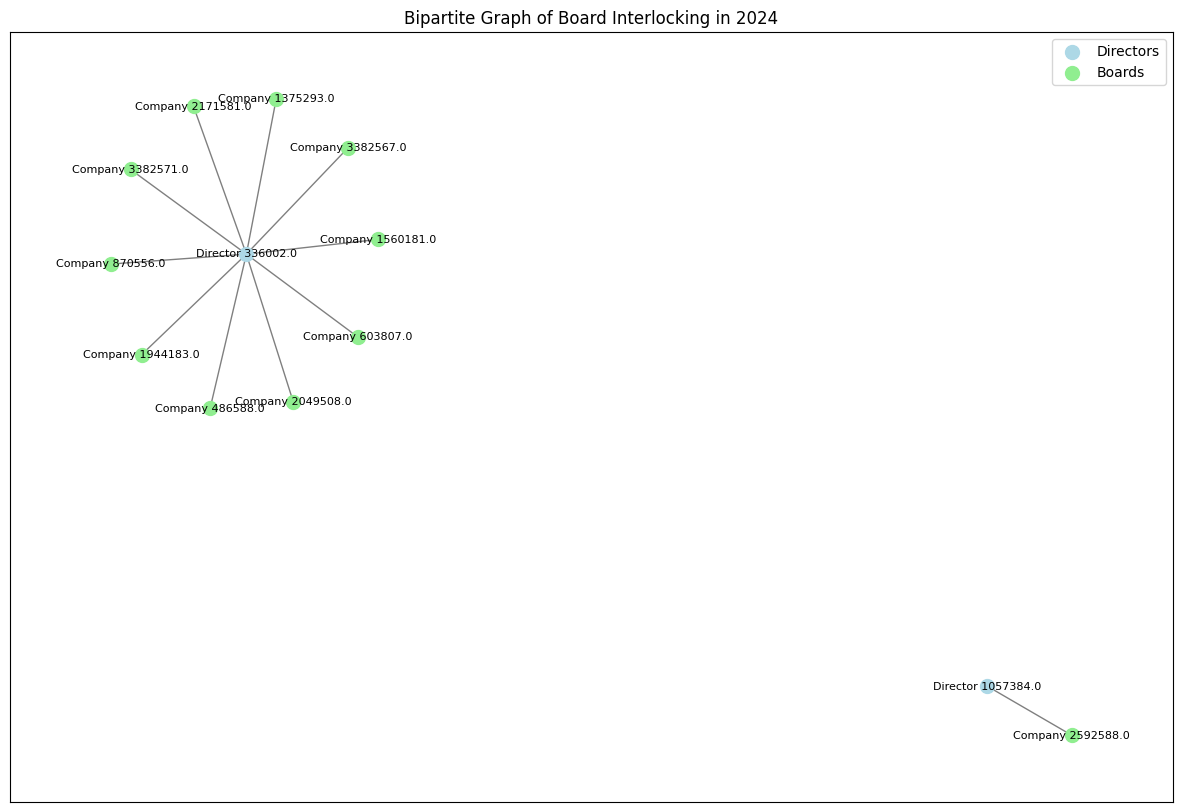

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the necessary columns
filtered_data = data[['Boardid', 'Companyid', 'Directorid', 'Overlapyearstart', 'Overlapyearend']]

# Define years range for visualizations
years = range(int(filtered_data['Overlapyearstart'].min()), int(filtered_data['Overlapyearend'].replace("Curr", 2024).max()) + 1)

# Create the bipartite graph
for year in years[-2:]:
    B = nx.Graph()
    
    # Add nodes and edges with appropriate attributes
    for index, row in filtered_data.iterrows():
        if year >= row['Overlapyearstart'] and year <= row['Overlapyearend']:
            director_name = f"Director {row['Directorid']}"
            company_name = f"Company {row['Companyid']}"
            B.add_node(director_name, bipartite=0, type='director')  # Add director nodes
            B.add_node(company_name, bipartite=1, type='board')  # Add board nodes
            B.add_edge(director_name, company_name, start=row['Overlapyearstart'], end=row['Overlapyearend'])
    
    # Only draw the graph if it has edges
    if B.edges:
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(B)  # Positions for all nodes
        
        # Separate by node type
        director_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']==0]
        company_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']==1]
        
        # Draw nodes and edges
        nx.draw_networkx_nodes(B, pos, nodelist=director_nodes, node_color='lightblue', node_size=100, label='Directors')
        nx.draw_networkx_nodes(B, pos, nodelist=company_nodes, node_color='lightgreen', node_size=100, label='Boards')
        nx.draw_networkx_edges(B, pos, alpha=0.5)
        nx.draw_networkx_labels(B, pos, font_size=8, font_color='black')
        
        plt.title(f'Bipartite Graph of Board Interlocking in {year}')
        plt.legend()
        plt.show()


Need some clear visualisations to show details of data

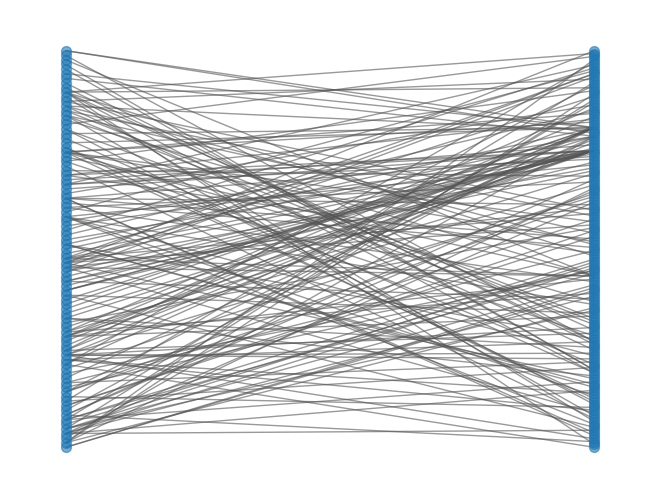

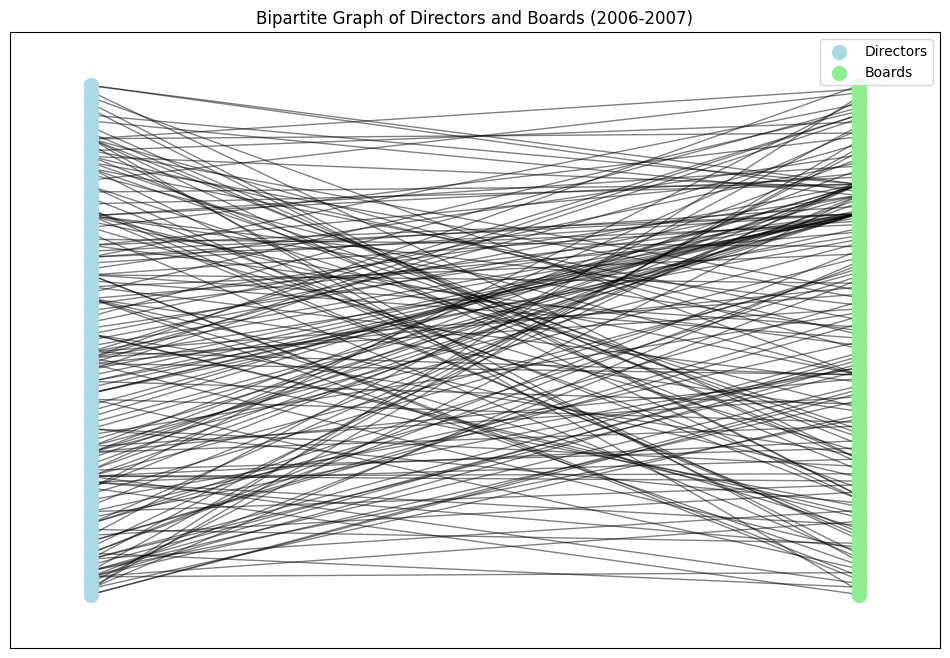

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert 'Overlapyearend' to integer if necessary (handling non-numeric values)
data['Overlapyearend'] = pd.to_numeric(data['Overlapyearend'], errors='coerce')

# Filter the data for an initial year range to start the graph
# Let's assume we are interested in overlaps starting from 2006 to 2007 for now
filtered_data = data[(data['Overlapyearstart'] <= 2007) & (data['Overlapyearend'] >= 2006)]

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
director_nodes = {row['Directorid']: {"type": "director"} for index, row in filtered_data.iterrows()}
board_nodes = {(row['Boardid'], row['Companyid']): {"type": "board"} for index, row in filtered_data.iterrows()}
B.add_nodes_from(director_nodes, bipartite=0)
B.add_nodes_from(board_nodes, bipartite=1)

# Add edges between directors and boards
edges = [(row['Directorid'], (row['Boardid'], row['Companyid'])) for index, row in filtered_data.iterrows()]
B.add_edges_from(edges)

# Draw the bipartite graph
pos = nx.bipartite_layout(B, nodes=director_nodes)
nx.draw(B, pos, with_labels=False, node_size=50, alpha=0.6, edge_color="#555555")

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(B, pos, nodelist=director_nodes.keys(), node_color='lightblue', node_size=100, label="Directors")
nx.draw_networkx_nodes(B, pos, nodelist=board_nodes.keys(), node_color='lightgreen', node_size=100, label="Boards")
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.title("Bipartite Graph of Directors and Boards (2006-2007)")
plt.legend()
plt.show()


Useful prompt to help you with the code here.

It is possible to create a bipartite graph with the boardex data attached, for board interlocking, where a director sits on multiple boards

Here in particular boardid and companyid means the same thing (just one represents one company and the other another company with another board, and directorid is the director such that they will sit on two company boards, represented by boardid and companyid.

The Overlapyearstart,	Overlapyearend, represents when there is board overlap between these companies.

Can you create a univariate graph for this using python and networkx, where the nodes are the directors and there is between nodes indicate shared board memberships between directors (i.e., two directors are connected if they sit on the same board)?

Can you also make it dynamic based on the Overlapyearstart,	Overlapyearend fields?

## Univariate structure

Create a univariate structure based on existing 

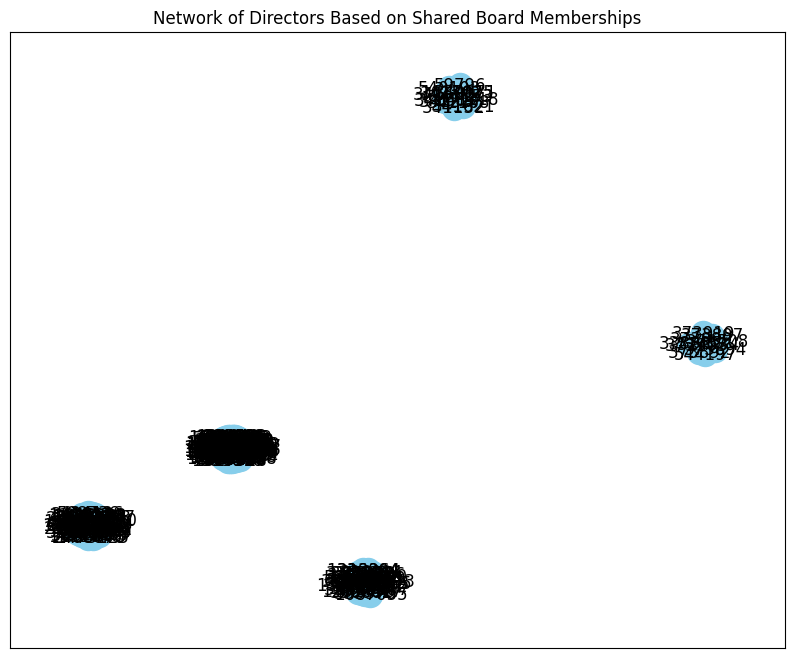

In [21]:
# Create a bipartite graph first to establish board memberships
G = nx.Graph()

# Add nodes for each director
G.add_nodes_from(data['Directorid'].unique(), bipartite=0, node_type='Director')

# Add nodes for each board
G.add_nodes_from(data['Boardid'].unique(), bipartite=1, node_type='Board')

# Add edges between directors and boards
for _, row in data.iterrows():
    G.add_edge(row['Directorid'], row['Boardid'])

# Create a new graph from the bipartite graph, connecting directors if they share a board
director_graph = nx.Graph()
for board in set(data['Boardid']):
    directors = list(G.neighbors(board))
    for i in range(len(directors)):
        for j in range(i + 1, len(directors)):
            if director_graph.has_edge(directors[i], directors[j]):
                director_graph[directors[i]][directors[j]]['weight'] += 1
            else:
                director_graph.add_edge(directors[i], directors[j], weight=1)

# Plotting
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(director_graph)
nx.draw_networkx(director_graph, pos, with_labels=True, node_color='skyblue', edge_color='#BBBBBB')
plt.title('Network of Directors Based on Shared Board Memberships')
plt.show()

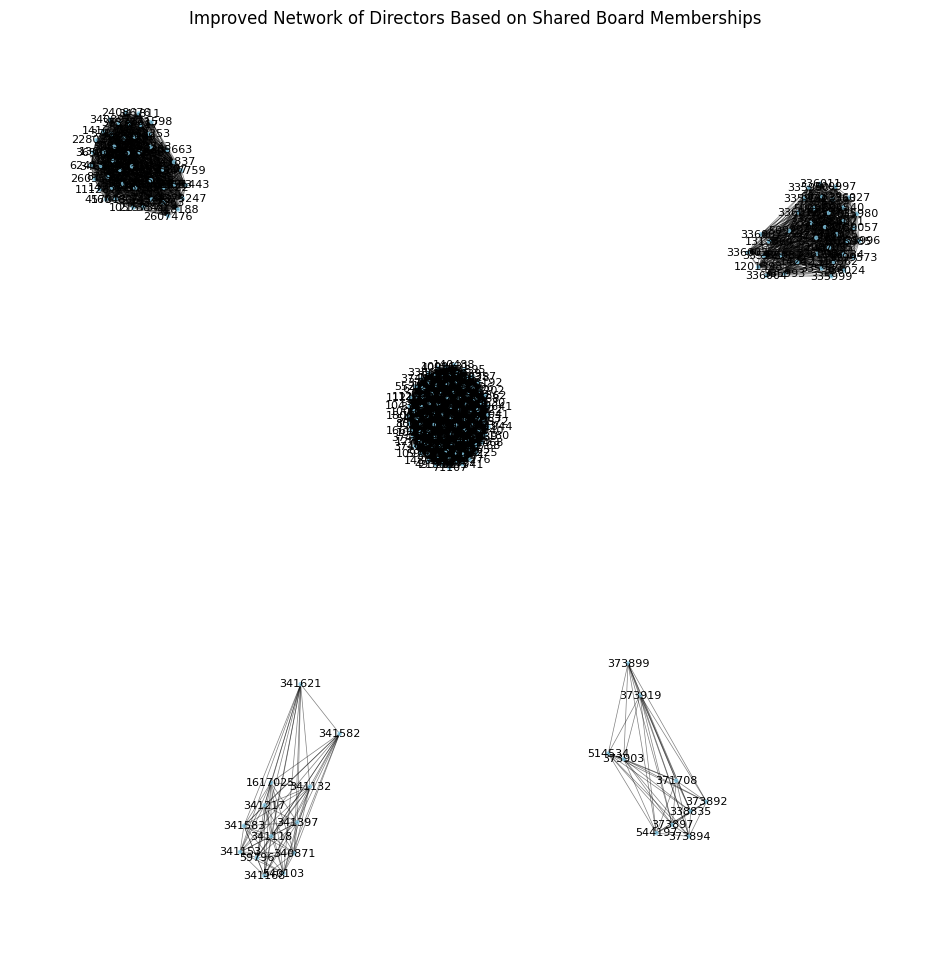

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'director_graph' is already created and populated

# Layout
pos = nx.spring_layout(director_graph, k=0.3, iterations=50)  # Adjust k for spacing, iterations for accuracy

# Nodes
#node_sizes = [director_graph.degree[n] * 100 for n in director_graph]  # Scale node sizes by degree
node_colors = ['skyblue' if director_graph.degree[n] > 5 else 'lightgrey' for n in director_graph]  # Highlight key nodes

# Edges
edge_widths = [0.5 * director_graph[u][v]['weight'] for u, v in director_graph.edges()]  # Scale edges by weight

# Draw
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(director_graph, pos, node_size=5, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(director_graph, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(director_graph, pos, font_size=8, font_color='black')

plt.title('Improved Network of Directors Based on Shared Board Memberships')
plt.axis('off')  # Hide the axes
plt.show()


Start again basic graph structure.

In [2]:
import pandas as pd

In [4]:
boardex_data = pd.read_csv("initial_datasets/boardex_sample_1000.csv")

In [10]:
import networkx as nx

In [11]:
import datetime

# Current year
current_year = datetime.datetime.now().year

# Function to handle 'Curr' and numeric conversion
def handle_year(value):
    if value == 'Curr':
        return current_year
    try:
        return int(value)
    except ValueError:
        return None

# Apply the function to the Overlapyearend column
boardex_data['Overlapyearend'] = boardex_data['Overlapyearend'].apply(handle_year)

EDA structure of the graphs

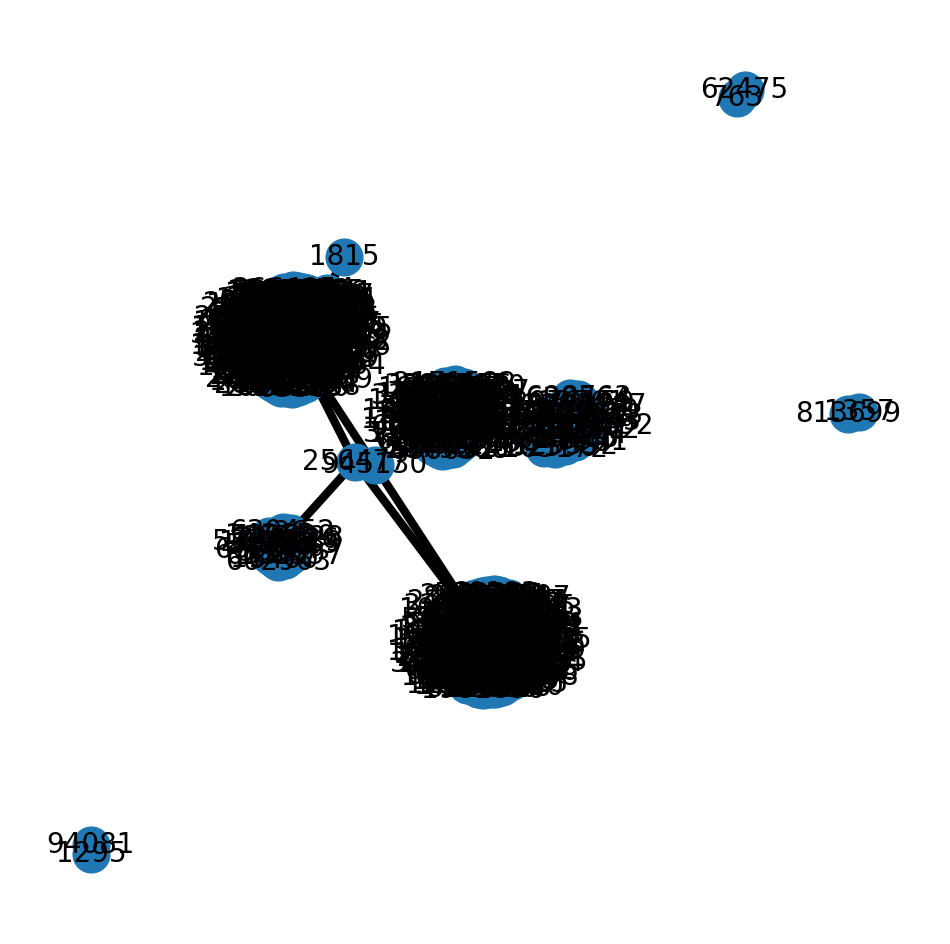

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Adding nodes and edges based on the board interlocks and director
for _, row in boardex_data.iterrows():
    board_id = row['Boardid']
    company_id = row['Companyid']
    director_id = row['Directorid']

    # Add nodes for board and company if not already in the graph
    G.add_node(board_id, type='board')
    G.add_node(company_id, type='company')

    # Add an edge between board and company linked by a director
    # This assumes that the boardid and companyid are the identifiers for different companies
    # and the connection is established via director sitting on both boards.
    if G.has_edge(board_id, company_id):
        G[board_id][company_id]['weight'] += 1
    else:
        G.add_edge(board_id, company_id, weight=1)

# Drawing the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
plt.axis('off')  # Turn off the axis
plt.show()

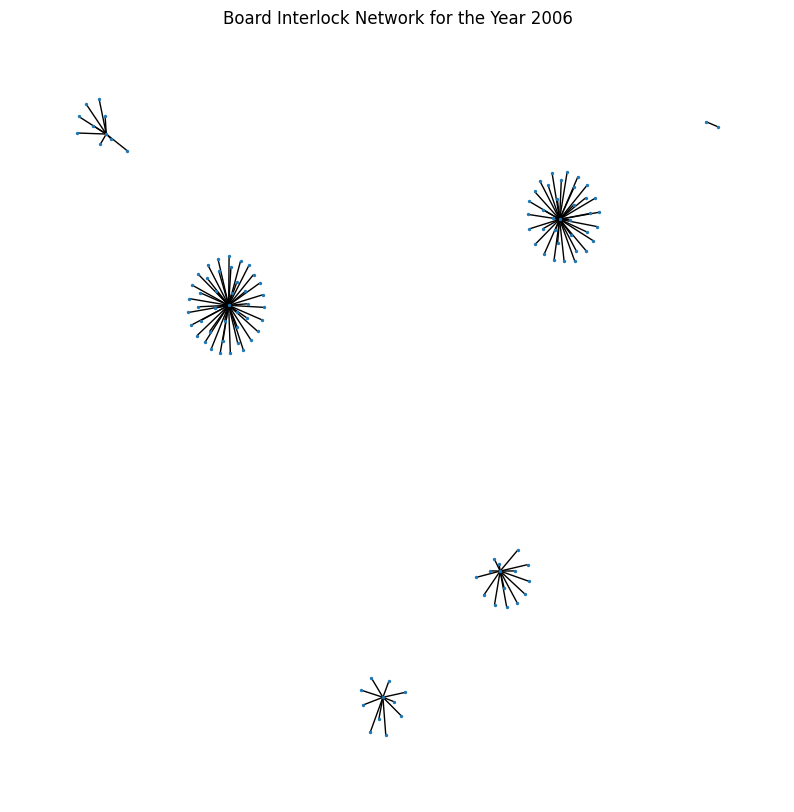

In [16]:
# Create a graph with yearly relationships based on the overlap start and end years
def create_yearly_graph(data, year):
    yearly_graph = nx.Graph()

    for _, row in data.iterrows():
        board_id = row['Boardid']
        company_id = row['Companyid']
        director_id = row['Directorid']
        start_year = int(row['Overlapyearstart'])
        end_year = int(row['Overlapyearend'])

        # Check if the specified year falls within the overlap period like alternative approach - should work!!!

        # just create a graph for each year that's it
        if start_year <= year <= end_year:
            # Add nodes for board and company if not already in the graph
            yearly_graph.add_node(board_id, type='board')
            yearly_graph.add_node(company_id, type='company')

            # Add an edge for the specified year with the director as attribute
            if yearly_graph.has_edge(board_id, company_id):
                yearly_graph[board_id][company_id]['weight'] += 1  # Increase weight if already connected
                # Append director to the list if not already there
                if director_id not in yearly_graph[board_id][company_id]['directors']:
                    yearly_graph[board_id][company_id]['directors'].append(director_id)
            else:
                yearly_graph.add_edge(board_id, company_id, weight=1, directors=[director_id])

    return yearly_graph

# Let's create a function that visualizes the graph for a given year
def visualize_graph_for_year(year, data):
    G_year = create_yearly_graph(data, year)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G_year)  # positions for all nodes
    nx.draw_networkx_nodes(G_year, pos, node_size=2)
    nx.draw_networkx_edges(G_year, pos, width=1)
    # nx.draw_networkx_labels(G_year, pos, font_size=20, font_family="sans-serif")
    plt.title(f"Board Interlock Network for the Year {year}")
    plt.axis('off')  # Turn off the axis
    plt.show()

# We will now define this setup and it can be used to visualize any specific year by calling visualize_graph_for_year
visualize_graph_for_year(2006, boardex_data)  # Example visualization for the year 2006

In [21]:
# Step 1: Identify all unique companies across all years


# interlocking in both to get everything
all_companies = set(boardex_data['Boardid']).union(set(boardex_data['Companyid']))

# Step 2: Modify the graph creation to include all companies every year
def create_consistent_graph(data, year, all_companies):
    yearly_graph = nx.Graph()

    # Ensure all companies are added as nodes first
    for company in all_companies:
        yearly_graph.add_node(company)

    # Add edges based on director interlocks for the specific year
    for _, row in data.iterrows():
        board_id = row['Boardid']
        company_id = row['Companyid']
        director_id = row['Directorid']
        start_year = int(row['Overlapyearstart'])
        end_year = int(row['Overlapyearend'])

        if start_year <= year <= end_year:
            if yearly_graph.has_edge(board_id, company_id):
                yearly_graph[board_id][company_id]['weight'] += 1  # Increase weight if already connected
                # Append director to the list if not already there
                if director_id not in yearly_graph[board_id][company_id]['directors']:
                    yearly_graph[board_id][company_id]['directors'].append(director_id)
            else:
                yearly_graph.add_edge(board_id, company_id, weight=1, directors=[director_id])

    return yearly_graph

# Step 3: Generate adjacency matrices with consistent dimensions

years = range(2005, 2008)

# generate the relevant adjacency matrices here converting from sparse for this example

consistent_adjacency_matrices = {}
for year in years:
    graph = create_consistent_graph(boardex_data, year, all_companies)
    adj_matrix = nx.adjacency_matrix(graph, nodelist=sorted(all_companies))  # Sorted to maintain order
    adj_matrix_df = pd.DataFrame(adj_matrix.todense(), index=sorted(all_companies), columns=sorted(all_companies))
    consistent_adjacency_matrices[year] = adj_matrix_df

# Display adjacency matrices for 2005 and 2006 as examples of consistent dimensions
consistent_adjacency_matrices[2005].shape, consistent_adjacency_matrices[2006].shape, consistent_adjacency_matrices[2007].shape




((520, 520), (520, 520), (520, 520))

In [ ]:
consistent_adjacency_matrices[2005], consistent_adjacency_matrices[2006]

In [23]:
type(consistent_adjacency_matrices[2005])

pandas.core.frame.DataFrame

In [25]:
consistent_adjacency_matrices[2005].to_csv("testing_adjacency/adjacency_2005_sample.csv")

# shows possible to create graph stats with this.